# Data Analysis on Unicorn Dataset

In [1]:
#Libraries for mathematical computation  
import numpy as np
import pandas as pd
#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sb
#Libraries for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load the dataset
df=pd.read_csv("Unicorn_Companies.csv")

# To understand the data

In [3]:
#To see first 5 records
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,07-04-2017,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,01-12-2012,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,03-07-2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,23-01-2014,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12-12-2011,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
#To see names of the columns
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [5]:
#To see information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1074 non-null   object 
 1   Valuation         1074 non-null   object 
 2   Date Joined       1074 non-null   object 
 3   Industry          1074 non-null   object 
 4   City              1058 non-null   object 
 5   Country           1074 non-null   object 
 6   Continent         1074 non-null   object 
 7   Year Founded      1074 non-null   int64  
 8   Funding           1074 non-null   float64
 9   Select Investors  1073 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 84.0+ KB


In [6]:
#To see statistical information about the dataset
df.describe()

,Year Founded,Funding
count,1074.000000,1074.000000
mean,2012.895717,0.551043
std,5.698573,0.807719
min,1919.000000,0.000000
25%,2011.000000,0.218000
50%,2014.000000,0.365000
75%,2016.000000,0.603000
max,2021.000000,14.000000


In [7]:
#To see number of rows and columns
df.shape

(1074, 10)

In [8]:
#To see datatypes 
df.dtypes

Company              object
Valuation            object
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

# Cleaning the data

In [9]:
#To see random 10 rows
df.sample(10)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
46,Zuoyebang,$10B,18-07-2018,Edtech,Beijing,China,Asia,2014,3.000,"Sequoia Capital China, Xiang He Capital, GGV C..."
15,BYJU's,$22B,25-07-2017,Edtech,Bengaluru,India,Asia,2008,4.000,"Tencent Holdings, Lightspeed India Partners, S..."
521,Aledade,$2B,19-01-2021,Health,Bethesda,United States,North America,2014,0.295,"Venrock, CVF Capital Partners, ARCH Venture Pa..."
864,Aptos,$1B,15-03-2022,Internet software & services,Palo Alto,United States,North America,2021,0.200,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
422,Temporal,$2B,16-02-2022,Internet software & services,Bellevue,United States,North America,2019,0.129,"Amplify Partners, Addition, Madrona Venture Group"
407,Lusha,$2B,10-11-2021,Internet software & services,New York,United States,North America,2016,0.245,"PSG, ION Crossover Partners"
596,Unqork,$2B,06-10-2020,Fintech,New York,United States,North America,2017,0.365,"Blackrock, capitalG, World Lab Innovation"
950,Kopi Kenangan,$1B,27-12-2021,Consumer & retail,Jakarta,Indonesia,Asia,2017,0.333,"Horizons Ventures, Sequoia Capital India, Alph..."
719,Epirus,$1B,14-02-2022,Other,Hawthorne,United States,North America,2018,0.287,"8VC, Bedrock Capital, Broom Ventures"
435,ABL Space Systems,$2B,25-03-2021,Other,El Segundo,United States,North America,2017,0.419,"T. Rowe Price, Lockheed Martin Ventures, Fidel..."


In [10]:
#First clean the valuation column
#To remove $ and B from Valuation column and change datatype of the column 
df['Valuation']=df['Valuation'].map(lambda X:X.lstrip('$'))
df['Valuation']=df['Valuation'].map(lambda X:X.rstrip('B'))
df['Valuation']=df['Valuation'].astype('float')

In [11]:
#To change the Date joined column datatype to date datatype
df["Date Joined"] = pd.to_datetime(df["Date Joined"])

In [12]:
#To change columns datatypes
df["Country"] = df["Country"].astype('category')
df["City"] = df["City"].astype('category')
df["Industry"] = df["Industry"].astype('category')

In [13]:
#To see the datatypes after changing column datatype
df.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                  category
City                      category
Country                   category
Continent                   object
Year Founded                 int64
Funding                    float64
Select Investors            object
dtype: object

In [14]:
#Adding new feature Year_joined from Date Joined
df['Year_joined'] = df['Date Joined'].dt.year

In [15]:
#Adding the feature to measure the amount of years it takes for each company to become a unicorn.
df['Years_to_Unicorn'] = df['Year_joined'] - df['Year Founded']

In [16]:
#To check if null values are present or not
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year_joined          0
Years_to_Unicorn     0
dtype: int64

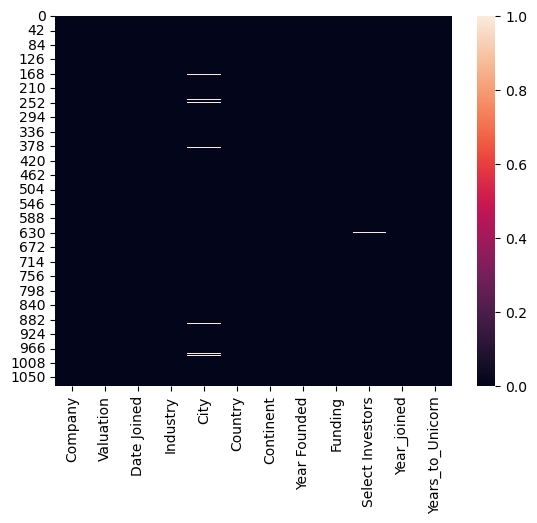

In [17]:
#To visualize the null values
sb.heatmap(df.isnull())
plt.show()

#Black color indicates that null values are present

In [18]:
#To drop the null values
df=df.dropna()

In [19]:
#To see again null values are present or not after drop null values
df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
Year_joined         0
Years_to_Unicorn    0
dtype: int64

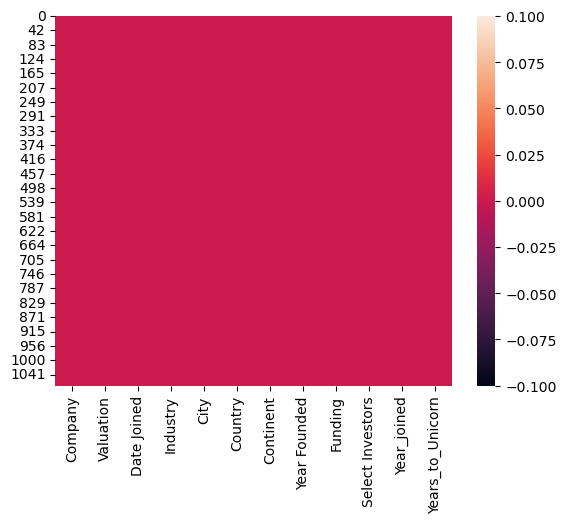

In [20]:
#To visualize the null value
sb.heatmap(df.isnull())
plt.show()

#Pink color indicate the null values are not present

In [21]:
#To see if duplicate value are present or not
df.duplicated().sum()

0

In [22]:
#Now the data is clean and well structred. So we do visualization

# Data Visualization

In [23]:
#To see how many categories in Industry column 
df['Industry'].value_counts()

Fintech                                218
Internet software & services           203
E-commerce & direct-to-consumer        107
Health                                  74
Artificial intelligence                 71
Other                                   58
Supply chain, logistics, & delivery     56
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             36
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Artificial Intelligence                 11
Name: Industry, dtype: int64

In [24]:
#Arranging the Industry with respect to companies
df.groupby('Industry').count().sort_values("Company", ascending=False)

,Company,Valuation,Date Joined,City,Country,Continent,Year Founded,Funding,Select Investors,Year_joined,Years_to_Unicorn
Industry,,,,,,,,,,,
Fintech,218,218,218,218,218,218,218,218,218,218,218
Internet software & services,203,203,203,203,203,203,203,203,203,203,203
E-commerce & direct-to-consumer,107,107,107,107,107,107,107,107,107,107,107
Health,74,74,74,74,74,74,74,74,74,74,74
Artificial intelligence,71,71,71,71,71,71,71,71,71,71,71
Other,58,58,58,58,58,58,58,58,58,58,58
"Supply chain, logistics, & delivery",56,56,56,56,56,56,56,56,56,56,56
Cybersecurity,50,50,50,50,50,50,50,50,50,50,50
Data management & analytics,41,41,41,41,41,41,41,41,41,41,41


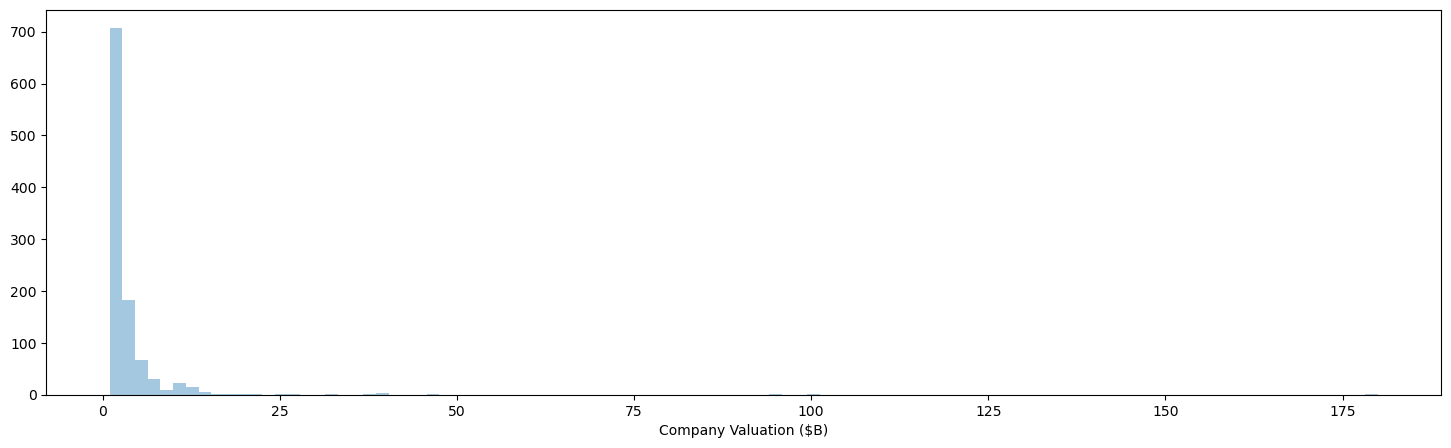

In [25]:
#Highest Valuation based on the data
plt.figure(figsize= (18, 5))
sb.distplot(x= df['Valuation'], bins= 100, kde= False)
plt.xlabel('Company Valuation ($B)')
plt.show()

In [26]:
#Grouping Industry  and the Valuation
industry_val = df.groupby('Industry')[['Valuation']].sum().reset_index().sort_values('Valuation', ascending= False)

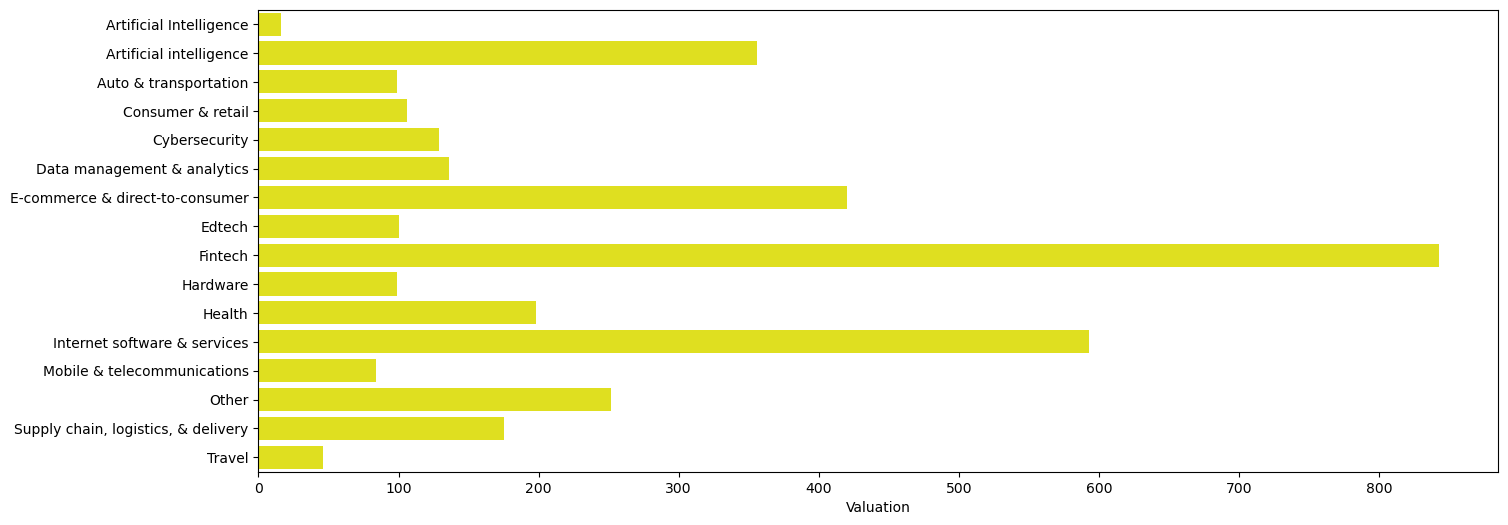

In [27]:
#Visualizing Industry and their valuation
plt.figure(figsize= (16, 6))
sb.barplot(x= 'Valuation',y='Industry',data=industry_val,color= 'Yellow')
plt.ylabel('')
plt.show()

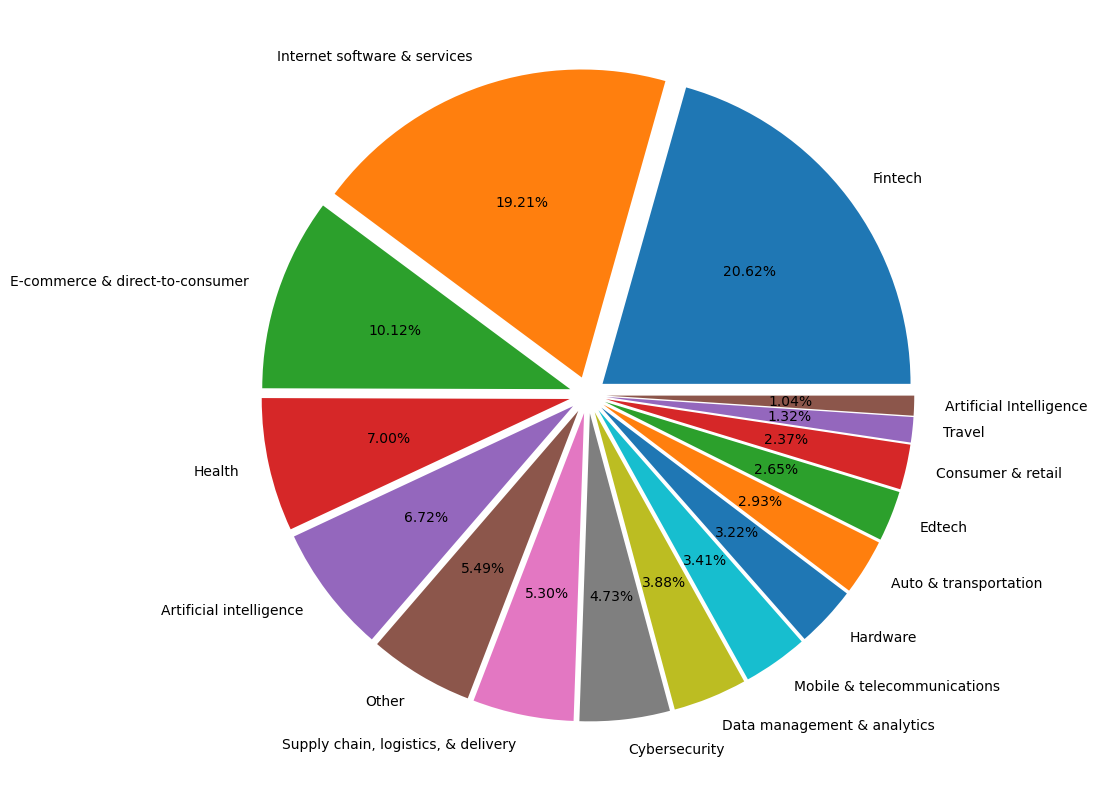

In [28]:
#Visualizing Industry and their valuation using pie char
plt.figure(figsize= (14, 10))
plt.pie(df.Industry.value_counts(), labels= df.Industry.value_counts().index, 
        autopct= '%1.2f%%', explode= [0.06for i in range(len(df.Industry.value_counts()))]);

In [29]:
#Grouping the country with the valuation
country_val= df.groupby('Country')[['Valuation']].sum().reset_index().sort_values('Valuation', ascending= False)

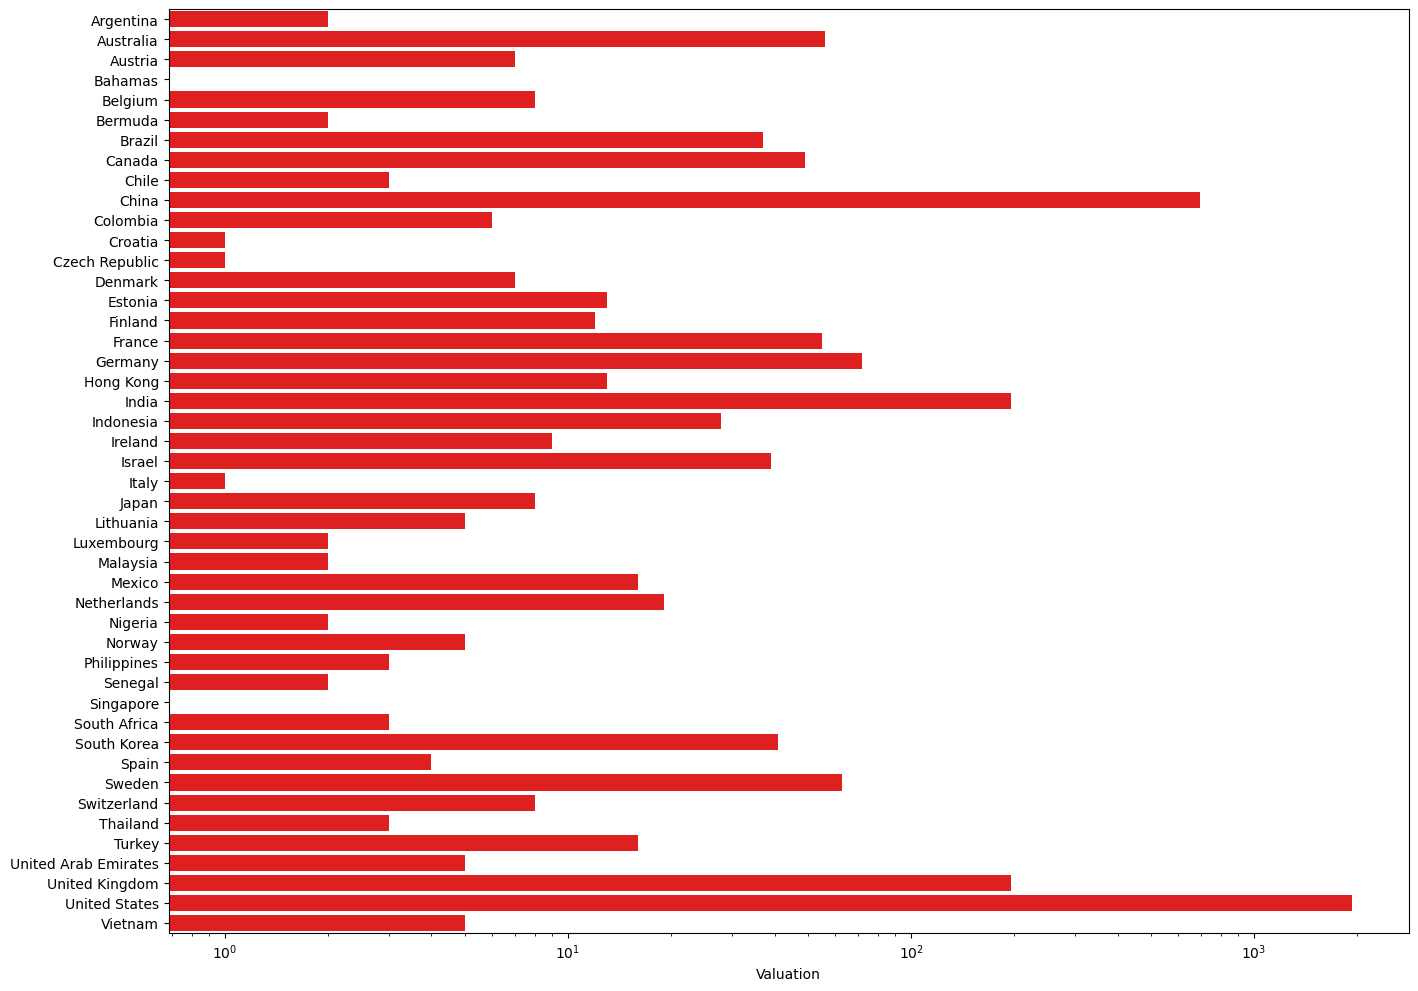

In [30]:
#Visualizing the Country and Valuation
plt.figure(figsize= (16, 12))
sb.barplot(x= 'Valuation', y= 'Country',data= country_val,color= 'red')
plt.xscale('log')
plt.ylabel('')
plt.show()

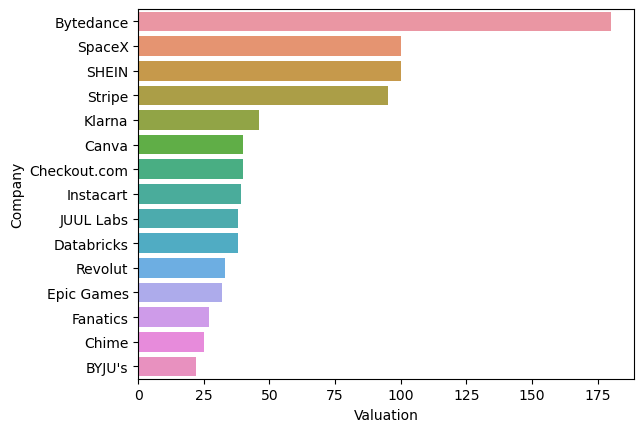

In [31]:
#Top Companies by Valuations
x=df[df['Valuation']>20]
sb.barplot(x=x['Valuation'],y=x['Company'])
plt.show()

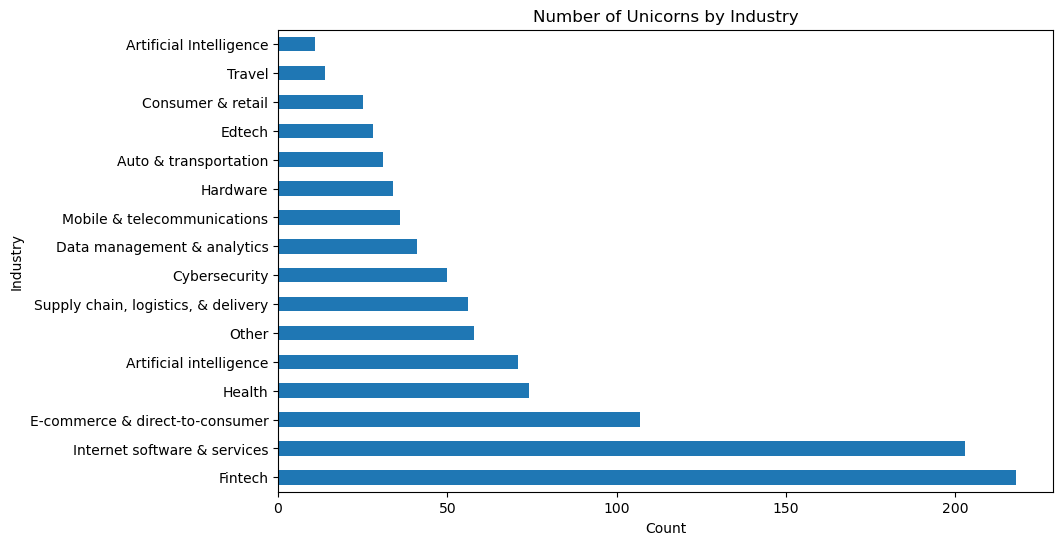

In [32]:
#Visualizing the Number of Unicorn given by the Industries
fig, ax = plt.subplots(figsize=(10,6))
x= df['Industry'].value_counts().plot(kind='barh')
x.set(xlabel='Count', ylabel='Industry', title='Number of Unicorns by Industry')
plt.show()

In [33]:
#To see top 5 countries who are giving unicorns
top= df['Country'].value_counts()[:5]
top

United States     562
China             172
India              65
United Kingdom     43
Germany            26
Name: Country, dtype: int64

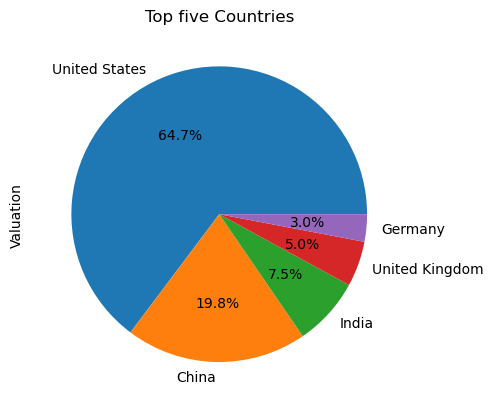

In [34]:
#To visualise the top 5 country giving unicorn
top.plot(kind='pie', title='Top five Countries', ylabel='Valuation',autopct='%1.1f%%')
plt.show()

In [35]:
#To see top 5 industries who are giving unicorns
a= df['Industry'].value_counts()[:5]
a

Fintech                            218
Internet software & services       203
E-commerce & direct-to-consumer    107
Health                              74
Artificial intelligence             71
Name: Industry, dtype: int64

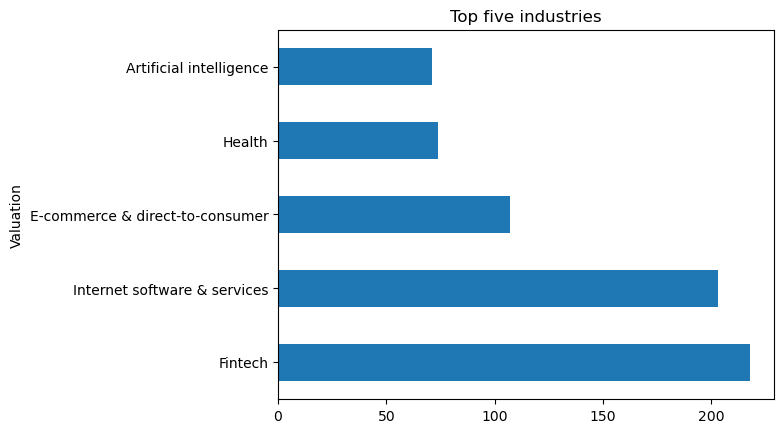

In [36]:
#To visualise the top 5 industries giving unicorn
a.plot(kind='barh', title='Top five industries', ylabel='Valuation')
plt.show()

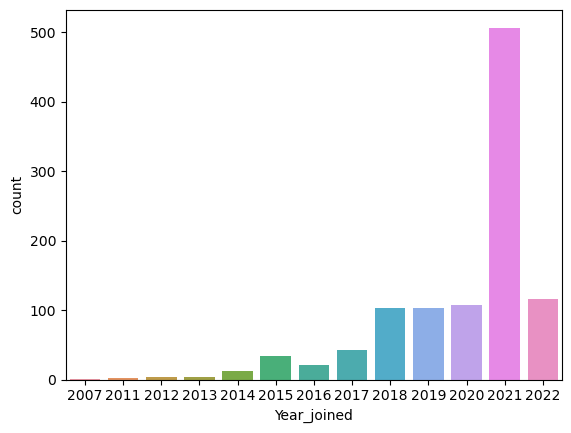

In [37]:
#To see years at which companies become unicorn
sb.countplot(df['Year_joined'])
plt.show()

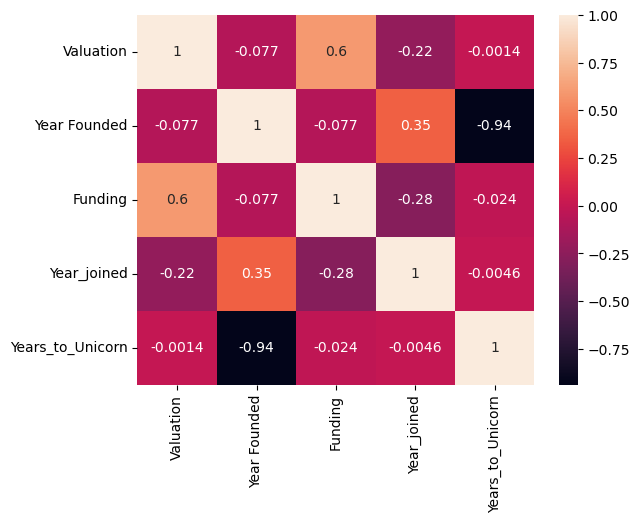

In [38]:
#To see the relation of all numeric  features with each other
sb.heatmap(df.corr(),annot=True)
plt.show()